In [1]:
import pandas as pd
import numpy as np

In [2]:
dat2=pd.read_csv('dataset/Dataset_02.csv')
dat2.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [3]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Q1

In [5]:
f=lambda x: x*3

In [6]:
f(4)

12

In [9]:
q1=dat2.groupby(['Sex', 'BP', 'Cholesterol'])['Age'].apply(lambda x: len(x)) / len(dat2)

In [10]:
q1

Sex  BP      Cholesterol
F    HIGH    HIGH           0.085
             NORMAL         0.105
     LOW     HIGH           0.070
             NORMAL         0.070
     NORMAL  HIGH           0.090
             NORMAL         0.060
M    HIGH    HIGH           0.090
             NORMAL         0.105
     LOW     HIGH           0.085
             NORMAL         0.095
     NORMAL  HIGH           0.095
             NORMAL         0.050
Name: Age, dtype: float64

In [11]:
q1.index

MultiIndex([('F',   'HIGH',   'HIGH'),
            ('F',   'HIGH', 'NORMAL'),
            ('F',    'LOW',   'HIGH'),
            ('F',    'LOW', 'NORMAL'),
            ('F', 'NORMAL',   'HIGH'),
            ('F', 'NORMAL', 'NORMAL'),
            ('M',   'HIGH',   'HIGH'),
            ('M',   'HIGH', 'NORMAL'),
            ('M',    'LOW',   'HIGH'),
            ('M',    'LOW', 'NORMAL'),
            ('M', 'NORMAL',   'HIGH'),
            ('M', 'NORMAL', 'NORMAL')],
           names=['Sex', 'BP', 'Cholesterol'])

In [12]:
q1[('F',   'HIGH', 'NORMAL')]

0.105

In [13]:
q1.unstack()

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

In [15]:
pd.crosstab(index=[dat2.Sex, dat2.BP],
            columns=dat2.Cholesterol, normalize=True)  # 답 0.105

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

In [ ]:
# Q2

In [16]:
q2=dat2.copy()

In [ ]:
# np.where(조건) # 조건에 만족하는 데이터의 위치번호 리턴
# np.where(조건, True인 경우 처리문, False인 경우 처리문)

In [ ]:
# q2['Age_gr']= np.where(dat2.Age.isna(), dat2.Age, 
#                   np.where(dat2.Age < 20, '10',
#                     np.where(dat2.Age < 30, '20',
#                        np.where(dat2.Age < 40, '30', 
#                          np.where(dat2.Age < 50, '40',
#                             np.where(dat2.Age < 60, '50', '60'))))))   

In [18]:
q2['Age_gr']=np.where(q2.Age < 20, '10',
                np.where(q2.Age < 30, '20',
                   np.where(q2.Age < 40, '30', 
                     np.where(q2.Age < 50, '40',
                        np.where(q2.Age < 60, '50', '60')))))     

In [19]:
q2['Na_K_gr'] = np.where(q2.Na_to_K <= 10, 'Lv1', 
                   np.where(q2.Na_to_K <= 20, 'Lv2',  
                      np.where(q2.Na_to_K <= 30, 'Lv3', 'Lv4')))      

In [20]:
# 카이스퀘어 검정 수행( 입력 값이 교차표로 작성되어 있어야 함)

from scipy.stats import chi2_contingency

In [25]:
# Sex-Drug: X

tab = pd.crosstab(index=q2.Sex, columns=q2.Drug)
chi2_contingency(tab)[1]

0.7138369773987128

In [26]:
# BP-Drug: O
tab = pd.crosstab(index=q2.BP, columns=q2.Drug)
chi2_contingency(tab)[1]

5.0417334144665895e-27

In [27]:
# Cholesterol-Drug: O
tab = pd.crosstab(index=q2.Cholesterol, columns=q2.Drug)
chi2_contingency(tab)[1]

0.0005962588389856497

In [28]:
# Age_gr-Drug: O
tab = pd.crosstab(index=q2.Age_gr, columns=q2.Drug)
chi2_contingency(tab)[1]

0.0007010113024729462

In [29]:
# Na_K_gr-Drug: O
tab = pd.crosstab(index=q2.Na_K_gr, columns=q2.Drug)
chi2_contingency(tab)[1]

1.1254641594413981e-14

In [ ]:
# 답: 4, 0.0007

In [ ]:
# Q3

In [30]:
q3=dat2.copy()

In [32]:
q3['Sex_cd'] = np.where(q3.Sex == 'M' , 0, 1)
q3['BP_cd']= np.where(q3.BP == 'LOW' , 0, np.where(q3.BP == 'NORMAL', 1,2))
q3['Ch_cd']=np.where(q3.Cholesterol == 'NORMAL', 0, 1)

In [33]:
q3_list=['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

In [34]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [35]:
dt=DecisionTreeClassifier().fit(q3[q3_list], q3['Drug'])  # 답: Na_to_K , 14.83

In [38]:
print(export_text(dt, feature_names=q3_list))

|--- Na_to_K <= 14.83
|   |--- BP_cd <= 1.50
|   |   |--- BP_cd <= 0.50
|   |   |   |--- Ch_cd <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.50
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.50
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.50
|   |   |--- Age <= 50.50
|   |   |   |--- class: drugA
|   |   |--- Age >  50.50
|   |   |   |--- class: drugB
|--- Na_to_K >  14.83
|   |--- class: DrugY



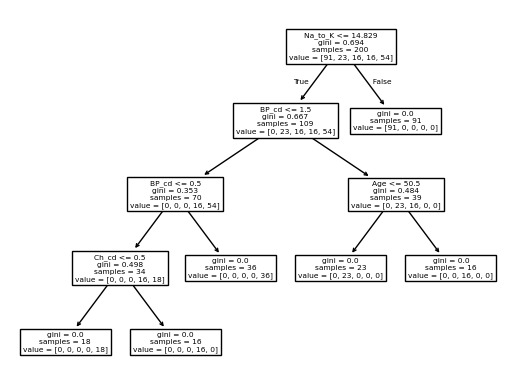

In [40]:
plot_tree(dt, feature_names=q3_list);